<a href="https://colab.research.google.com/github/tahoeskier5/MIT-Data-Science-Course/blob/main/Assignment_20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration of word embeddings

In this notebook, examine trained word embeddings, and explore word similarities.

In [ ]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [ ]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [ ]:
model.most_similar("cold", topn=20)

[('cool', 0.8103547692298889),
 ('hot', 0.8010528087615967),
 ('warm', 0.7918359637260437),
 ('dry', 0.784081757068634),
 ('chill', 0.7586870193481445),
 ('heat', 0.7549161314964294),
 ('turning', 0.7393249273300171),
 ('weather', 0.7335986495018005),
 ('intense', 0.7242282629013062),
 ('deep', 0.7234195470809937),
 ('temperatures', 0.7227210402488708),
 ('little', 0.7130317687988281),
 ('cooler', 0.7115269303321838),
 ('heavy', 0.7092522382736206),
 ('winter', 0.7077405452728271),
 ('snow', 0.7043208479881287),
 ('ground', 0.7036628127098083),
 ('too', 0.7010939717292786),
 ('dangerous', 0.7007119059562683),
 ('atmosphere', 0.7000380754470825)]

Find the cosine similarity between two words

In [ ]:
model.similarity("good", "bad")

0.79648936

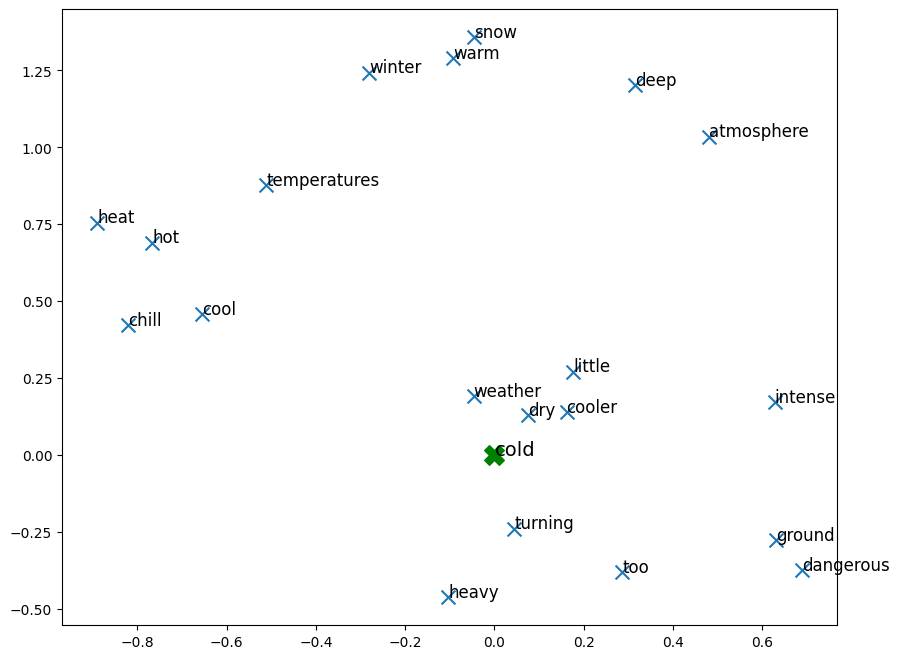

In [ ]:
import matplotlib.pyplot as plt

word = 'cold'
similar_words = model.similar_by_word(word, topn=20)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
x = [vector[0] for vector in similar_word_vectors]
y = [vector[1] for vector in similar_word_vectors]
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, marker='x', s=100) # set marker as 'x' and increase size to 100

# add labels for the similar words
for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax.annotate(word, (x[i], y[i]), size=12) # increase size of the word labels to 12

# add the original word at origin
word = 'cold'
ax.scatter(0, 0, marker='X', s=200, color='green')
ax.annotate(word, (0, 0), size=14)

# show the plot
plt.show()